In [407]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("../../logs/train_metrics_20251220_1343.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,adamw_lr,muon_lr,timestamp
0,0,11.073222,11.070035,0.253236,0.000000,16306.912038,0.000000e+00,0.000000,2025-12-20T13:43:33.244589
1,3,11.066835,NaN,NaN,0.000000,142851.982420,0.000000e+00,0.000000,2025-12-20T13:44:53.719822
2,6,11.073400,NaN,NaN,7.443299,146644.364938,2.399981e-07,0.000024,2025-12-20T13:44:55.642772
3,9,11.059859,NaN,NaN,7.443299,143508.801751,2.399981e-07,0.000024,2025-12-20T13:44:57.449006
4,12,11.068305,NaN,NaN,7.311061,144371.075010,4.799962e-07,0.000048,2025-12-20T13:44:59.306459
...,...,...,...,...,...,...,...,...,...
3568,10235,3.662865,NaN,NaN,0.405517,139239.949281,3.000000e-04,0.030000,2025-12-20T15:57:06.503280
3569,10236,3.700438,NaN,NaN,0.405517,138015.516579,3.000000e-04,0.030000,2025-12-20T15:57:07.126906
3570,10237,3.582941,NaN,NaN,0.405517,138633.525554,3.000000e-04,0.030000,2025-12-20T15:57:07.747765
3571,10238,3.589428,NaN,NaN,0.405517,141252.999707,3.000000e-04,0.030000,2025-12-20T15:57:08.357147


In [ ]:
df_metrics["timestamp"] = pd.to_datetime(df_metrics["timestamp"])

# adjust timestamps after a slight hickup in training.
cutoff = pd.Timestamp("2025-12-20T15:50:00")
mask = df_metrics["timestamp"] < cutoff
df_metrics.loc[mask, "timestamp"] += pd.Timedelta(minutes=24)


df_metrics["elapsed_hours"] = (df_metrics["timestamp"] - df_metrics["timestamp"].iloc[0]).dt.total_seconds() / 3600


df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,adamw_lr,muon_lr,timestamp,elapsed_hours
0,0,11.073222,11.070035,0.253236,0.000000,16306.912038,0.000000e+00,0.000000,2025-12-20 14:07:33.244589,0.000000
1,3,11.066835,NaN,NaN,0.000000,142851.982420,0.000000e+00,0.000000,2025-12-20 14:08:53.719822,0.022354
2,6,11.073400,NaN,NaN,7.443299,146644.364938,2.399981e-07,0.000024,2025-12-20 14:08:55.642772,0.022888
3,9,11.059859,NaN,NaN,7.443299,143508.801751,2.399981e-07,0.000024,2025-12-20 14:08:57.449006,0.023390
4,12,11.068305,NaN,NaN,7.311061,144371.075010,4.799962e-07,0.000048,2025-12-20 14:08:59.306459,0.023906
...,...,...,...,...,...,...,...,...,...,...
3568,10235,3.662865,NaN,NaN,0.405517,139239.949281,3.000000e-04,0.030000,2025-12-20 15:57:06.503280,1.825905
3569,10236,3.700438,NaN,NaN,0.405517,138015.516579,3.000000e-04,0.030000,2025-12-20 15:57:07.126906,1.826078
3570,10237,3.582941,NaN,NaN,0.405517,138633.525554,3.000000e-04,0.030000,2025-12-20 15:57:07.747765,1.826251
3571,10238,3.589428,NaN,NaN,0.405517,141252.999707,3.000000e-04,0.030000,2025-12-20 15:57:08.357147,1.826420


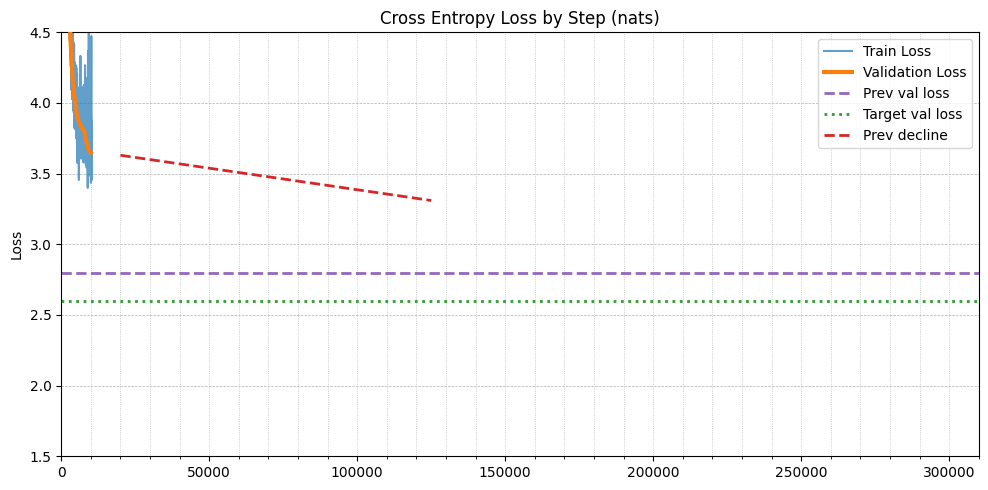

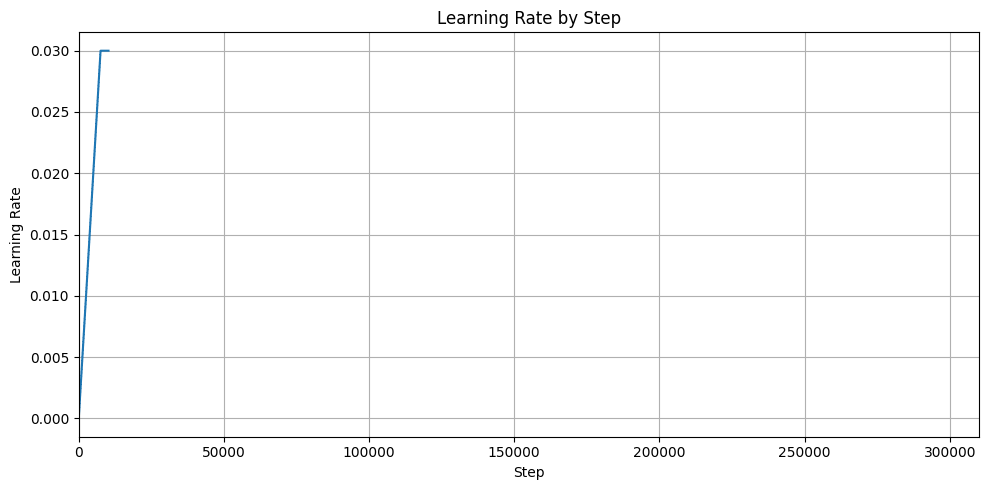

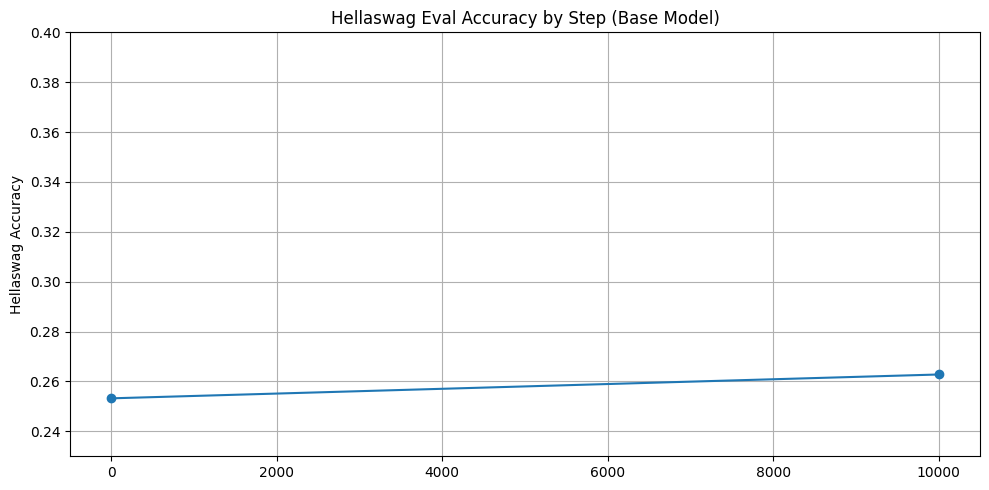

In [409]:
# Training Loss Figure

fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)

ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)

# Add horizontal lines for previous and target val loss
ax1.axhline(2.8, color="tab:purple", linestyle="--", linewidth=2, label="Prev val loss")
ax1.axhline(2.6, color="tab:green", linestyle=":", linewidth=2, label="Target val loss")
ax1.plot([20000, 125000], [3.63, 3.31], color="tab:red", linestyle="--", linewidth=2, label="Prev decline", zorder=99)

ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
# ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)
ax1.set_ylim(bottom=1.5, top=4.5)
ax1.set_xlim(left=0, right=310000)
fig1.patch.set_facecolor("white")


plt.tight_layout()
plt.show()

# Learning Rate Figure
fig2, ax2 = plt.subplots(figsize=(10, 5))
# ax2.plot(df_metrics["step"], df_metrics["adamw_lr"], color="tab:green")
ax2.plot(df_metrics["step"], df_metrics["muon_lr"], color="tab:blue")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.set_title("Learning Rate by Step")
ax2.set_xlim(left=0, right=310000)
ax2.grid(True)
plt.tight_layout()
plt.show()

# Hellaswag Eval Accuracy Figure
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.plot(
    df_metrics["step"][df_metrics["hellaswag_acc"].notna()],
    df_metrics["hellaswag_acc"][df_metrics["hellaswag_acc"].notna()],
    color="tab:blue",
    marker="o",
)
ax3.set_ylabel("Hellaswag Accuracy")
ax3.set_title("Hellaswag Eval Accuracy by Step (Base Model)")
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.4)
plt.tight_layout()
plt.show()

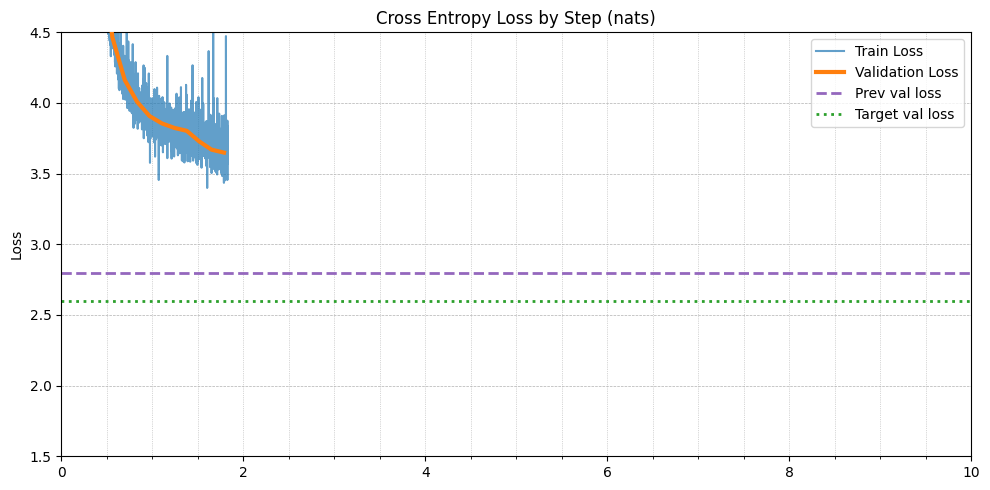

In [410]:
# Training Loss Figure by hours

fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
ax1.plot(
    df_metrics["elapsed_hours"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)

ax1.plot(
    df_metrics["elapsed_hours"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)

# Add horizontal lines for previous and target val loss
ax1.axhline(2.8, color="tab:purple", linestyle="--", linewidth=2, label="Prev val loss")
ax1.axhline(2.6, color="tab:green", linestyle=":", linewidth=2, label="Target val loss")
# ax1.plot([20000, 125000], [3.63, 3.31], color="tab:red", linestyle="--", linewidth=2, label="Prev decline", zorder=99)

ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
# ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)
ax1.set_ylim(bottom=1.5, top=4.5)
ax1.set_xlim(left=0, right=10)
fig1.patch.set_facecolor("white")


plt.tight_layout()
plt.show()


/tmp/ipykernel_203867/2162054836.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


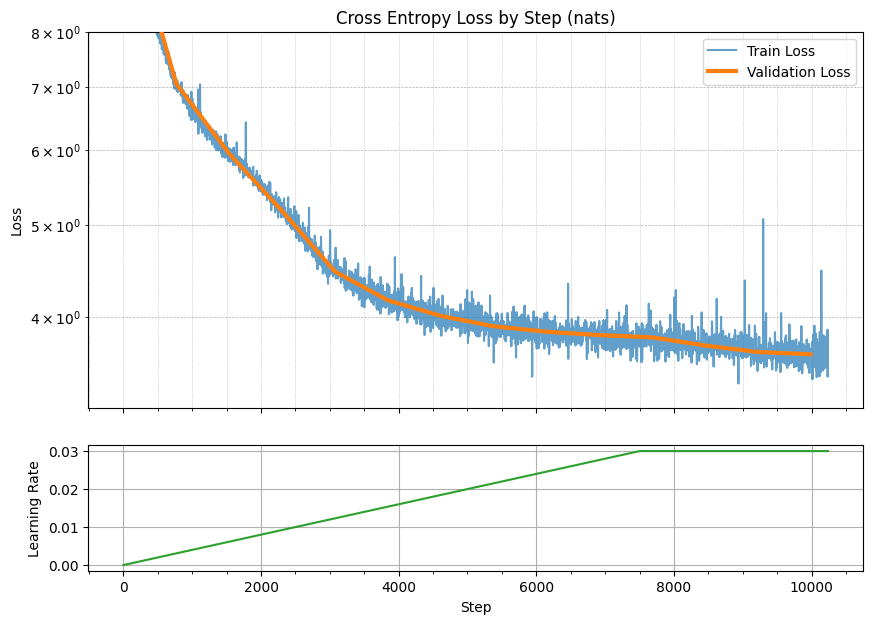

In [411]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec

# Create a figure with GridSpec to control height ratios
fig = plt.figure(figsize=(10, 7), facecolor="white")
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.15)  # loss taller, lr shorter

# --- Loss Plot ---
ax1 = fig.add_subplot(gs[0])
ax1.plot(
    df_metrics["step"],
    df_metrics["train_loss"],
    color="tab:blue",
    alpha=0.7,
    label="Train Loss",
)
ax1.plot(
    df_metrics["step"][df_metrics["val_loss"].notna()],
    df_metrics["val_loss"][df_metrics["val_loss"].notna()],
    color="tab:orange",
    label="Validation Loss",
    zorder=4,
    linewidth=3,
)
ax1.legend()
ax1.yaxis.grid(True, which="both", linestyle="--", linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which="both", linestyle=":", linewidth=0.5)
ax1.set_yscale("log")
ax1.set_ylabel("Loss")
ax1.set_ylim(top=8.0)
ax1.set_title("Cross Entropy Loss by Step (nats)")
ax1.grid(True)

# Remove x-axis labels and ticks for the top plot
ax1.set_xlabel("")
ax1.tick_params(labelbottom=False)

# --- Learning Rate Plot ---
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(df_metrics["step"], df_metrics["muon_lr"], color="tab:green")
ax2.set_xlabel("Step")
ax2.set_ylabel("Learning Rate")
ax2.grid(True)

# Clean layout
plt.tight_layout()
plt.show()


In [412]:
# Load the contents
with open("../../logs/instruct_training_metrics.jsonl", "r") as f:
    train_instruct = [json.loads(line) for line in f]

df_instruct = pd.DataFrame(train_instruct)
df_instruct

,step,train_loss,val_loss,lr
0,0,4.197428,6.082433,1.000000e-07
1,4,3.872044,6.073633,1.000000e-07
2,8,4.115608,6.063669,1.000000e-07
3,12,3.824431,6.054693,1.000000e-07
4,16,3.635496,6.044918,1.000000e-07
...,...,...,...,...
2531,4128,1.837087,1.985803,1.000000e-06
2532,4160,1.906322,1.985070,1.000000e-06
2533,4192,1.907518,1.984091,1.000000e-06
2534,4224,1.901350,1.983422,1.000000e-06


In [413]:
# fig1, ax1 = plt.subplots(figsize=(10, 5), facecolor="white")
# ax1.plot(
#     df_instruct["step"],
#     df_instruct["train_loss"],
#     color="tab:blue",
#     alpha=0.7,
#     label="Train Loss",
# )

# ax1.plot(
#     df_instruct["step"][df_instruct["val_loss"].notna()],
#     df_instruct["val_loss"][df_instruct["val_loss"].notna()],
#     color="tab:orange",
#     label="Validation Loss",
#     zorder=4,
#     linewidth=3,
# )